In [2]:

import matplotlib.pyplot as plt
import numpy as npn
from grape.embedders import FirstOrderLINEEnsmallen
from grape import Graph
from glob import glob


/Users/marcin/Documents/VIMSS/ontology/KG-Hub/KG-Microbe/kg-microbe/notebooks/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

node_path = glob("../data/merged/merged-kg_nodes.tsv", recursive=True)[0]
edge_path = glob("../data/merged/merged-kg_edges.tsv", recursive=True)[0]

In [4]:
kg_microbe = Graph.from_csv(
    # Edges related parameters

    ## The path to the edges list tsv
    edge_path=edge_path,
    ## Set the tab as the separator between values
    edge_list_separator="\t",
    ## The first rows should NOT be used as the columns names
    edge_list_header=True,
    ## The source nodes are in the first nodes
    sources_column="subject",
    #sources_column_number=1,
    ## The destination nodes are in the second column
    destinations_column="object",
    #destinations_column_number=4,
    ## Both source and destinations columns use numeric node_ids instead of node names
    edge_list_numeric_node_ids=False,
    ## The weights are in the third column
    weights_column_number=None,

    #edge_type_path=edge_path,
    edge_list_edge_types_column="predicate",    

    # Nodes related parameters
    ## The path to the nodes list tsv
    node_path=node_path,
    ## Set the tab as the separator between values
    node_list_separator="\t",
    ## The first rows should be used as the columns names
    node_list_header=True,
    ## The column with the node names is the one with name "node_name".
    nodes_column="id",
    #nodes_column_number=1,

    #node_type_path=node_path,
    node_list_node_types_column="category",
    
    # Graph related parameters
    ## The graph is undirected
    directed=False,
    ## The name of the graph is HomoSapiens
    name="kg_microbe",
    ## Display a progress bar, (this might be in the terminal and not in the notebook)
    verbose=True,
)

In [5]:
%%time
from grape.embedders import DeepWalkSkipGramEnsmallen

model = DeepWalkSkipGramEnsmallen(
    normalize_by_degree=True
)

degree_normalized_deepwalk_embedding = model.fit_transform(kg_microbe)

CPU times: user 1d 8h 3min 41s, sys: 3min 55s, total: 1d 8h 7min 36s
Wall time: 3h 20min 6s


/Users/marcin/Documents/VIMSS/ontology/KG-Hub/KG-Microbe/kg-microbe/notebooks/venv/lib/python3.10/site-packages/embiggen/utils/abstract_models/abstract_embedding_model.py:169: UserWarning: Please be advised that the kg_microbe graph contains 27833 disconnected nodes. Consider that node embedding algorithms that only use topological information such as CBOW, GloVe, SPINE and SkipGram are not able to provide meaningful embeddings for these nodes, and their embedding will be generally far away from any other node. It is also possible that all disconnected nodes will receive a relatively similar node embedding. Consider dropping them by using the `graph.remove_disconnected_nodes()` method.
  warnings.warn(


In [18]:
import datetime

import pickle
import pandas as pd

current_datetime = datetime.datetime.now()
formatted_date = current_datetime.strftime("%Y-%m-%d_%H_%M_%S")

with open('DeepWalkSkipGramEnsmallen_degreenorm_embedding_'+formatted_date+'.pkl', 'wb') as file:
    # Use the 'wb' mode to write in binary mode
    pickle.dump(degree_normalized_deepwalk_embedding, file)


In [21]:
node_embed = degree_normalized_deepwalk_embedding.get_all_node_embedding()#to_csv(formatted_date+".tsv",sep="\t")

In [38]:
node_embed[1]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
IAO:0000115,-0.103066,-0.204637,-0.094839,0.186166,-0.074497,-0.134343,0.094524,-0.109508,0.200830,0.139075,...,0.057052,0.035237,-0.027964,-0.101966,0.134352,0.076991,-0.121370,0.065863,0.215993,0.082252
NCBITaxon:1000003,1.248792,0.692944,-2.269448,-1.407682,-1.980585,-0.157345,1.918231,1.387954,-2.689307,2.581810,...,-0.372413,0.579535,1.352518,0.539919,-0.026786,0.497389,3.460025,-1.546538,-0.940014,-0.275848
NCBITaxon:1000010,1.116922,-1.458046,-2.203875,-1.126805,-0.436809,-2.367512,1.247414,-1.200235,-3.563263,2.111330,...,0.789803,0.020485,0.576646,1.324691,1.807899,0.701000,-0.050084,-1.126404,-1.719478,0.717961
NCBITaxon:1000018,1.584591,-1.615758,1.905125,-1.371793,1.043509,-4.115077,2.548041,-1.251158,0.637183,0.800275,...,0.450323,2.729065,3.263324,-0.891028,1.077212,0.729958,0.637655,-0.559962,-0.835319,-0.156956
NCBITaxon:1000025,2.381915,-2.188906,-0.418222,-3.195490,0.864024,-1.527972,1.705708,-1.101140,-0.574107,2.924806,...,-1.100049,1.226413,1.078407,-1.236825,2.155932,1.484197,2.717083,-0.052734,0.108608,-1.427431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCBITaxon:1967662,-0.058350,0.020490,-0.106840,-0.013620,0.055892,-0.160119,0.201409,-0.150790,-0.203215,-0.183707,...,0.235302,-0.116385,-0.114399,0.021773,-0.222980,0.043301,-0.016892,0.233852,0.047588,0.175127
NCBITaxon:1967644,-0.211906,0.087840,0.103972,0.131980,-0.202559,0.223363,-0.155580,-0.007086,-0.132221,0.138998,...,-0.094364,0.071570,-0.208237,-0.190298,0.093948,0.169618,-0.041926,-0.108720,-0.099492,0.191233
NCBITaxon:1311788,1.862855,-0.818927,-0.336877,-1.074558,-0.053731,-2.748730,2.076947,0.501045,-0.582036,0.729925,...,0.146171,0.229763,0.124504,1.251642,0.878243,0.241973,0.897071,-1.038855,-2.186764,-0.582971
NCBITaxon:1819728,0.753127,-0.079827,0.120944,-0.923588,0.638511,-2.966384,1.391481,-0.273485,-1.413450,1.348224,...,-0.741314,0.634542,0.003833,0.666151,0.028027,0.194250,1.234785,-1.036780,-1.379742,0.333046


In [26]:
import csv

with open("DeepWalkSkipGramEnsmallen_degreenorm_embedding_"+formatted_date+".tsv", 'w', newline='') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(node_embed)

In [39]:
node_embed_df = pd.DataFrame(node_embed[1])
node_embed_df.to_csv("DeepWalkSkipGramEnsmallen_degreenorm_embedding_1_"+formatted_date+".tsv", sep="\t")

/Users/marcin/Documents/VIMSS/ontology/KG-Hub/KG-Microbe/kg-microbe/notebooks/venv/lib/python3.10/site-packages/pydantic/_internal/_config.py:317: UserWarning: Valid config keys have changed in V2:
* 'underscore_attrs_are_private' has been removed
  warnings.warn(message, UserWarning)


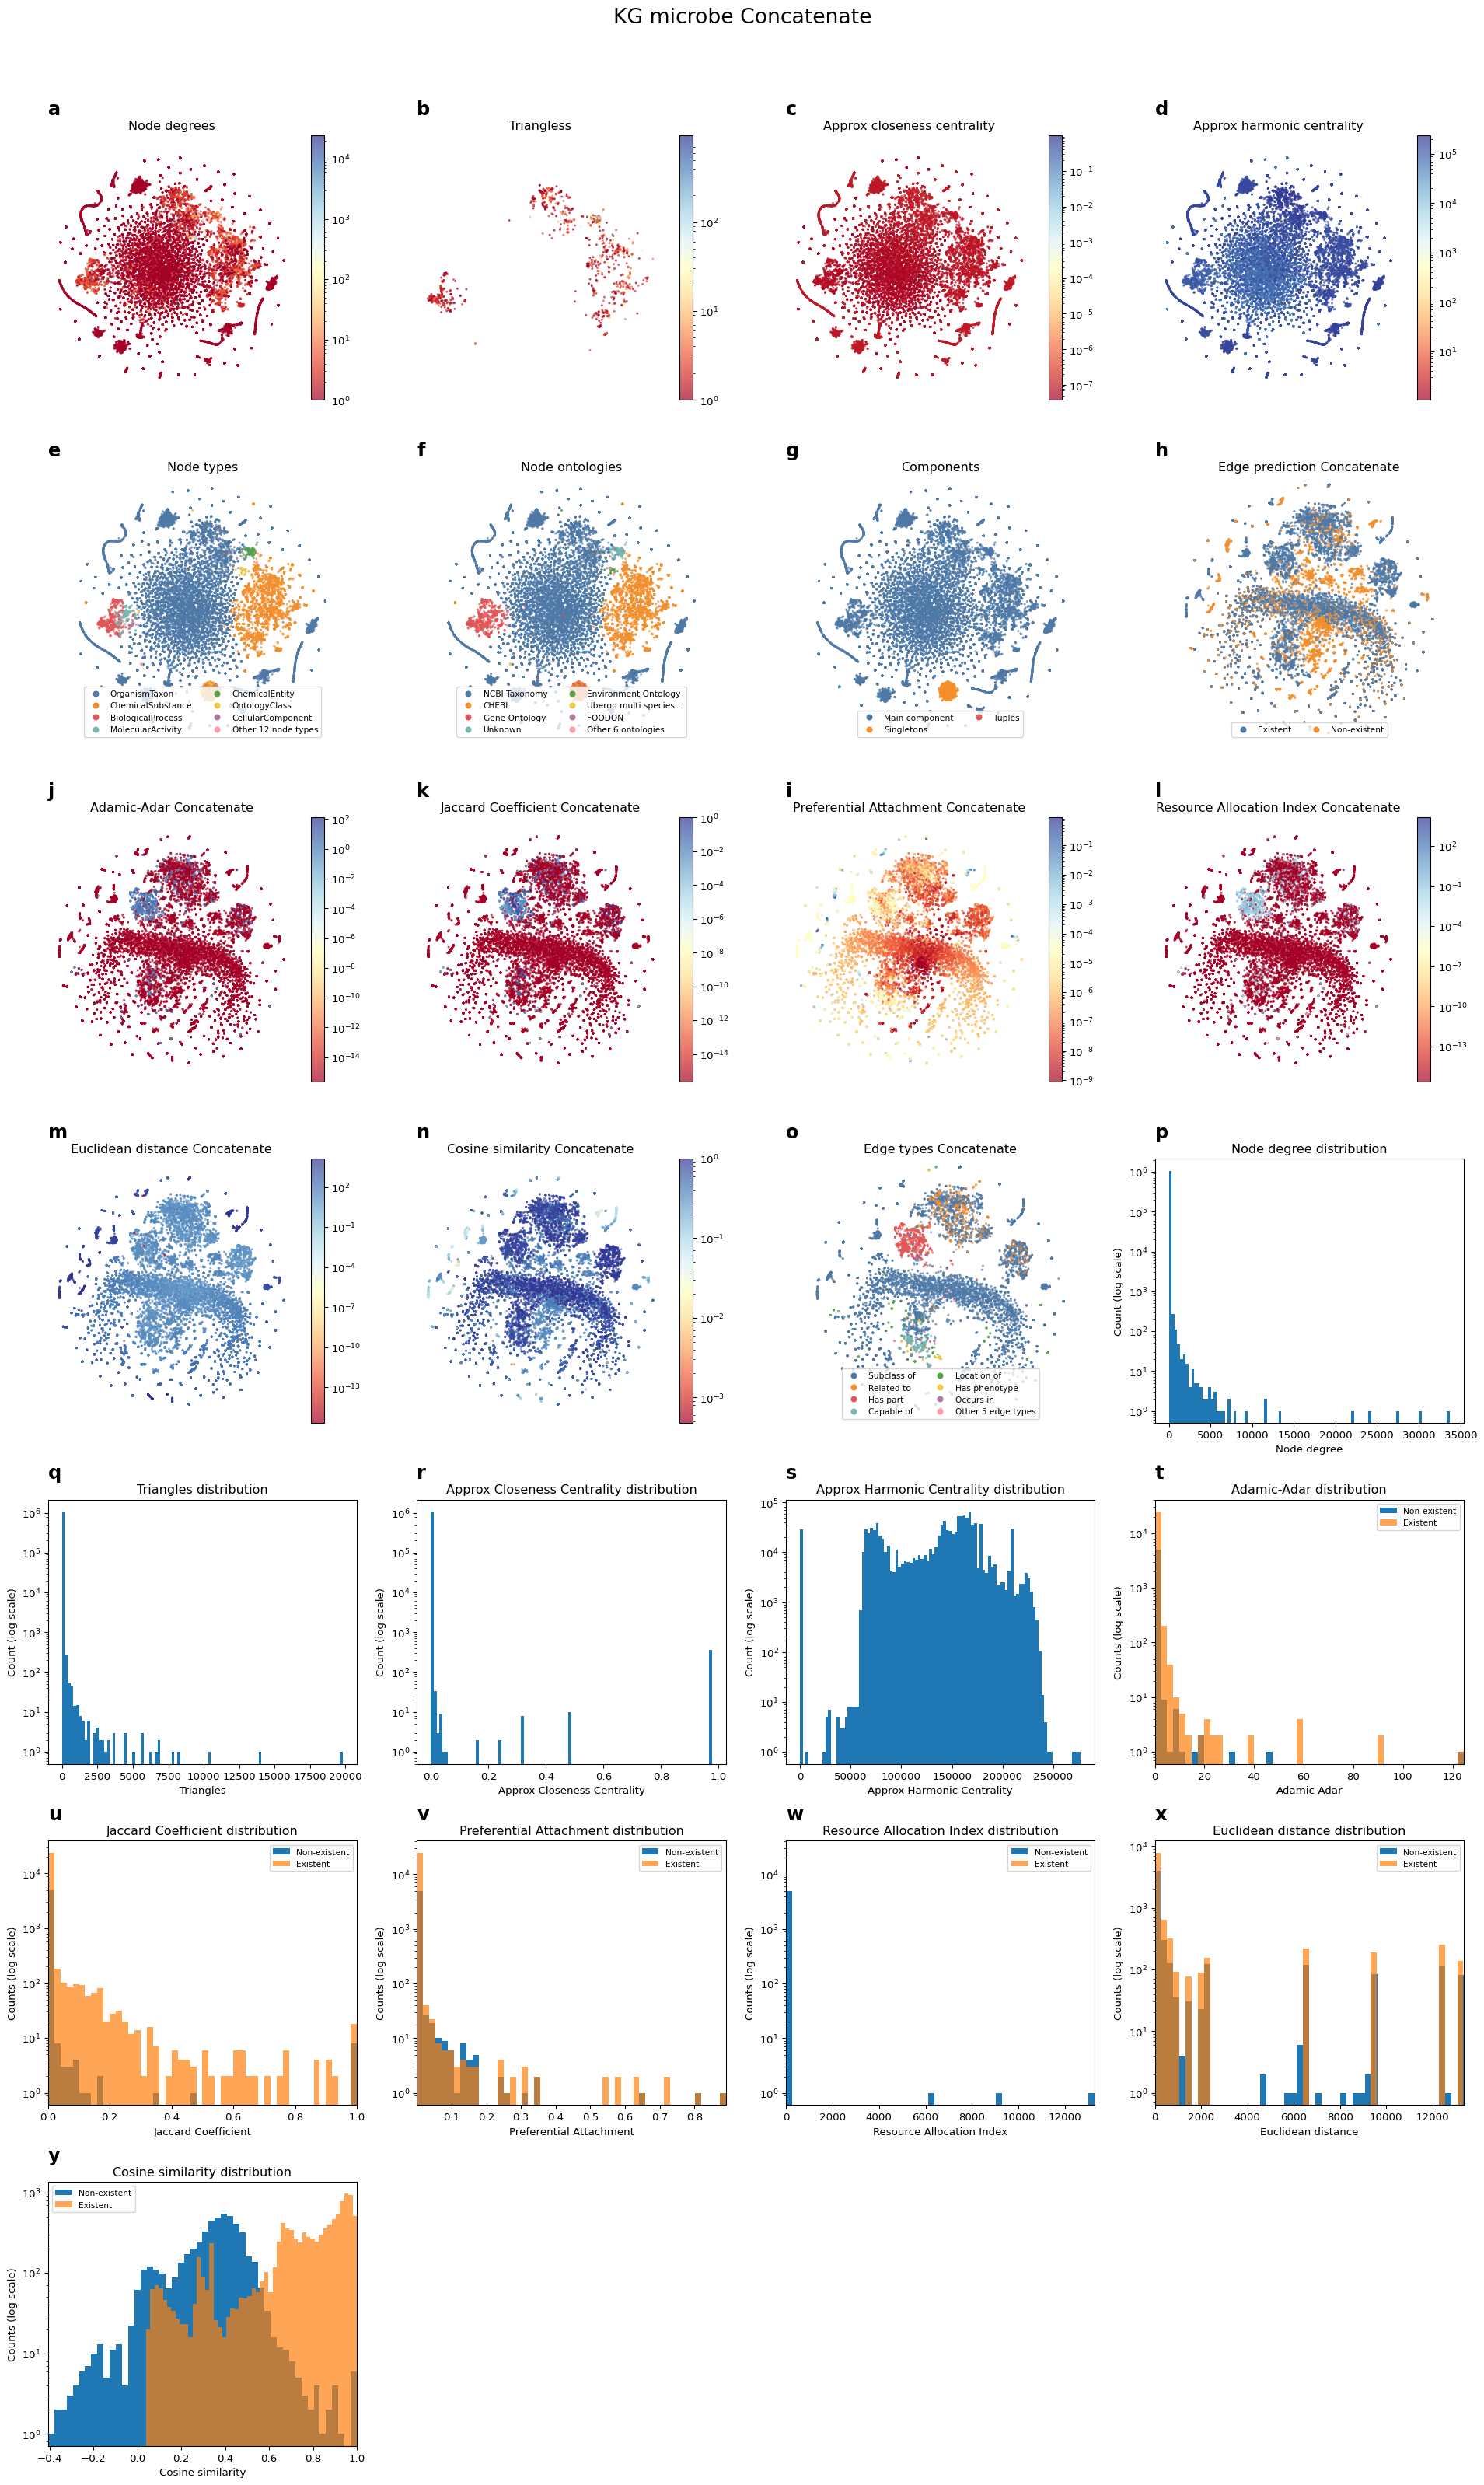

In [13]:
from grape import GraphVisualizer

GraphVisualizer(kg_microbe).fit_and_plot_all(degree_normalized_deepwalk_embedding)
